# Heat Diffusion

This validation test following "H K Versteeg and W Malalasekera,
An Introduction to Computational Fluid Dynamics: THE FINITE VOLUME METHOD,
Second Edition, 2007" examples 4.1,4.2.

This test is validating the correct implementation of the diffusive transport
across a domain.

The temperature along a metal rod is given by this equation:

$T(x) = \left( \frac{T(L) - T(0)}{L} + \frac{S}{2k} (L-x) \right) x$

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/MultiphaseTestBench')
import Manager as mptb
#from TransportModels_dev import TransportModels
import TransportModels
# write '4.1' or '4.2'
exampleId = '4.1'

# geometric parameters
LenX = {'4.1':0.5, '4.2':0.02}[exampleId]
LenY = {'4.1':0.1, '4.2':0.004}[exampleId]

# thermal conductivity [ W / (m K) ]
k = {'4.1':1000.0, '4.2':0.5}[exampleId]

# heat source [ W / m^3 ]
heatSource = {'4.1':0, '4.2':1e6}[exampleId]

# const temperature at left/right boundaries [K]
T_l = {'4.1':100, '4.2':100}[exampleId]
T_r = {'4.1':500, '4.2':200}[exampleId]

resolution = {'4.1':10, '4.2':250}[exampleId]
#resolution = {'4.1':10, '4.2':2500}[exampleId]

# the cross sectional area is hard coded in createMatrixCoefficients()
# the cross sectional area should be defined by the geometry/mesh
geom = mptb.createGeometry( 'rectangle', [LenX, LenY] )
mesh = mptb.createMesh( geom, res=resolution )

flowModels = {
    'T' : TransportModels.scalarTransport
}

#Defining passive velocity Fields:
passiveFields = {
    'u' : 'faces_u',
    'v' : 'faces_v'
}

mptb.initialize(flowModels, mesh, geom, passiveFields=passiveFields )

T = mptb.getField('T')

T.govModel.setDiffusionCoefficient(k)

#Odin.listAvailableBoundaryModels(field=T)
mptb.defineBoundaryCondition(field=T, boundaryName='top', type='zeroGradient' )
mptb.defineBoundaryCondition(field=T, boundaryName='bottom', type='zeroGradient' )
mptb.defineBoundaryCondition(field=T, boundaryName='left', type='fixedValue', value=T_l )
mptb.defineBoundaryCondition(field=T, boundaryName='right', type='fixedValue', value=T_r )

mptb.setConstSource(field=T, value=heatSource, mesh=mesh )

T.data = mptb.solve(T)
print(T.data)

[[140. 220. 300. 380. 460.]]


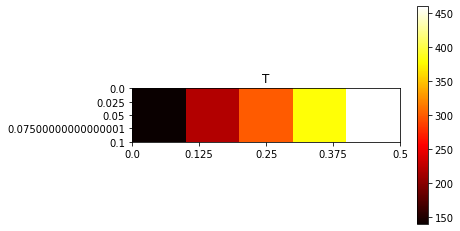

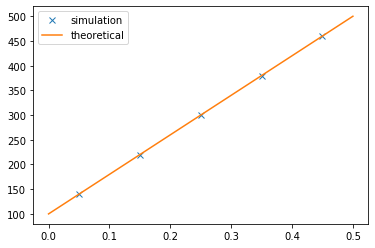

[140. 220. 300. 380. 460.]


In [2]:
# post-processing:
import numpy as np
import matplotlib.pyplot as plt

# the temperature along the x-axis should develop as:
def tempDistr( x ):
    return ((T_r-T_l)/LenX + S/(2*k)*(LenX-x))*x + T_l

mptb.display(T, mesh, 'T')

nbcellsX = mesh.cells_x
cellSpacing = mesh.uniformSpacing
#L = geom.lenX

xSim = np.linspace(0+0.5*cellSpacing,LenX-0.5*cellSpacing,nbcellsX)
ySim = T.data[0,:]

xTheo = np.linspace(0,LenX, 100)
S = np.ones(len(xTheo))*heatSource
yTheo = tempDistr(xTheo)

ax = plt.gca()
ax.plot(xSim, ySim, 'x', label='simulation')
ax.plot(xTheo, yTheo, label='theoretical')

plt.legend()
plt.show()

print(ySim)

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)